<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Bayesian Modeling Homework</div>
<div style="text-align: right">Group6 -- Tingkai Hu, Ran Zhou, 21 February 2019</div>

# Homework 5: Posterior Predictive Checks on a Model

Let's build a Bayesian model for the one team of National Football League, we pick up New England Patriots team. and we improve the team by varying parameters of our data model.

Let's get start!
<img src="images/new_england_patriots.png" width=150 />

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425


## 1. Data Import

We find data from [https://github.com/ryurko/nflscrapR-data/tree/master/games_data/regular_season](https://github.com/ryurko/nflscrapR-data/tree/master/games_data/regular_season) We choose regular games of 2018 and team NE.


In [33]:
from urllib.request import urlopen
import json
import pandas as pd
from pandas import DataFrame

reg_2018 = pd.read_csv('reg_games_2018.csv')
reg_2018.head(5)

,type,game_id,home_team,away_team,week,season,state_of_game,game_url,home_score,away_score
0,reg,2018090600,PHI,ATL,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,18,12
1,reg,2018090900,BAL,BUF,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,47,3
2,reg,2018090907,NYG,JAX,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,15,20
3,reg,2018090906,NO,TB,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,40,48
4,reg,2018090905,NE,HOU,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,27,20


We find there are many factors count in a game of NFL: The Passing Yards(pyds), and The Rushing Yards(ryds), Penalty(pen), Penalty Yards(penyds), Turnovers(trnover), pt, ptyds and ptavg. And these factors have influences on score.

We observe and collect data over all games in 2018:

In [34]:
df = DataFrame(columns=('pyds','ryds','pen','penyds','trnovr','pt','ptyds','ptavg', 'score'))
df

,pyds,ryds,pen,penyds,trnovr,pt,ptyds,ptavg,score


In [35]:
for i in range(len(reg_2018)):
    if (reg_2018.loc[i]['home_team']=='NE'):
        score = reg_2018.loc[i]['home_score']
        u = urlopen(reg_2018.loc[i]['game_url'])
        resp = json.loads(u.read().decode('utf-8'))
        pyds = resp[(str)(reg_2018.loc[i]['game_id'])]['home']['stats']['team']['pyds']
        ryds = resp[(str)(reg_2018.loc[i]['game_id'])]['home']['stats']['team']['ryds']
        pen = resp[(str)(reg_2018.loc[i]['game_id'])]['home']['stats']['team']['pen']
        penyds = resp[(str)(reg_2018.loc[i]['game_id'])]['home']['stats']['team']['penyds']
        trnovr = resp[(str)(reg_2018.loc[i]['game_id'])]['home']['stats']['team']['trnovr']
        pt = resp[(str)(reg_2018.loc[i]['game_id'])]['home']['stats']['team']['pt']
        ptyds = resp[(str)(reg_2018.loc[i]['game_id'])]['home']['stats']['team']['ptyds']
        ptavg = resp[(str)(reg_2018.loc[i]['game_id'])]['home']['stats']['team']['ptavg']
        df.loc[i] = [pyds,ryds,pen,penyds,trnovr,pt,ptyds,ptavg,score]
    elif (reg_2018.loc[i]['away_team']=='NE'):
        score = reg_2018.loc[i]['away_score']
        u = urlopen(reg_2018.loc[i]['game_url'])
        resp = json.loads(u.read().decode('utf-8'))
        pyds = resp[(str)(reg_2018.loc[i]['game_id'])]['away']['stats']['team']['pyds']
        ryds = resp[(str)(reg_2018.loc[i]['game_id'])]['away']['stats']['team']['ryds']
        pen = resp[(str)(reg_2018.loc[i]['game_id'])]['away']['stats']['team']['pen']
        penyds = resp[(str)(reg_2018.loc[i]['game_id'])]['away']['stats']['team']['penyds']
        trnovr = resp[(str)(reg_2018.loc[i]['game_id'])]['away']['stats']['team']['trnovr']
        pt = resp[(str)(reg_2018.loc[i]['game_id'])]['away']['stats']['team']['pt']
        ptyds = resp[(str)(reg_2018.loc[i]['game_id'])]['away']['stats']['team']['ptyds']
        ptavg = resp[(str)(reg_2018.loc[i]['game_id'])]['away']['stats']['team']['ptavg']
        df.loc[i] = [pyds,ryds,pen,penyds,trnovr,pt,ptyds,ptavg,score]
df.index = range(len(df))
df

,pyds,ryds,pen,penyds,trnovr,pt,ptyds,ptavg,score
0,267,122,6,36,3,6,281,44,27
1,220,82,2,25,1,4,222,45,20
2,120,89,5,38,1,5,217,38,10
3,274,175,6,57,2,2,80,29,38
4,341,97,7,50,2,4,193,39,38
5,327,173,0,0,1,0,0,0,43
6,273,108,7,64,3,4,171,34,38
7,311,76,5,33,0,4,148,29,25
8,310,123,5,30,0,3,149,50,31
9,244,40,4,31,0,6,298,39,10


We plot each factor with score to find the distribution.

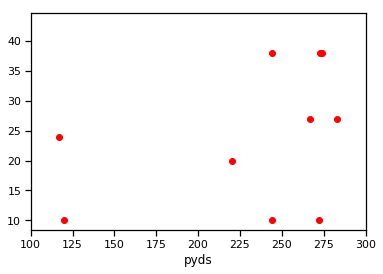

In [36]:
df.plot(x='pyds', y='score', style='ro', legend=False, xlim=(100,300));

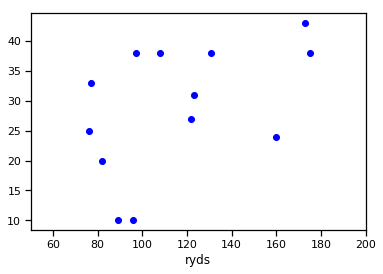

In [37]:
df.plot(x='ryds', y='score', style='bo', legend=False, xlim=(50,200));

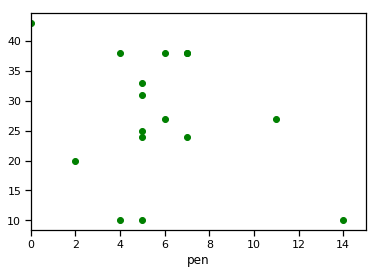

In [38]:
df.plot(x='pen', y='score', style='go', legend=False, xlim=(0,15));

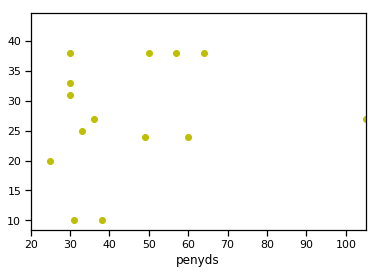

In [39]:
df.plot(x='penyds', y='score', style='yo', legend=False, xlim=(20,105));

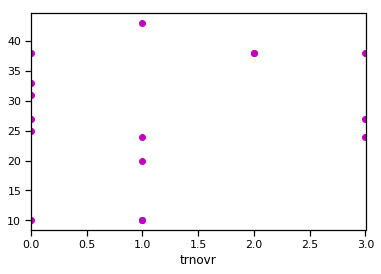

In [40]:
df.plot(x='trnovr', y='score', style='mo', legend=False, xlim=(0,3));

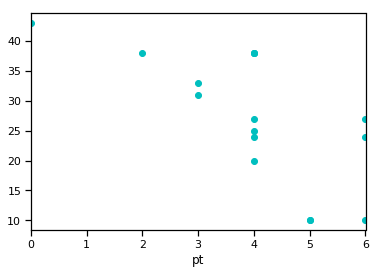

In [41]:
df.plot(x='pt', y='score', style='co', legend=False, xlim=(0,6));

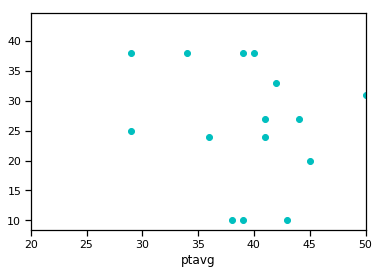

In [42]:
df.plot(x='ptavg', y='score', style='co', legend=False, xlim=(20,50));

## 2. Linear sum of squares

Let's look at the general linear effect of factors on the game score. Let's build a linear predictive model (a line).

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible, as with our Vandermonde exercise in our linear algenra introduction notebook. Instead, we choose a reasonable criterion: ***the smallest sum of the squared differences between modelled $\hat{y}$ and observed $y$***.

<div style="font-size: 120%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  
</div>

Squaring serves two purposes: 

1. to prevent positive and negative values from cancelling each other out
2. to strongly penalize large deviations. 

Whether or not the latter is a desired depends on the goals of the analysis.

In other words, we will select the parameters that minimize the squared error of the model. Let's write the cost function:

In [43]:
sum_of_squares = lambda θ, x, y: np.sum((y - θ[0] - θ[1]*x) ** 2)

However, we have the stated objective of minimizing the sum of squares, so we can pass this function to one of several optimizers in SciPy:

In [44]:
from scipy.optimize import fmin
df=pd.DataFrame(df,dtype=np.float)
x1, x2, x3, x4, x5, x6, x7, x8, y= df.T.values
# x1.dtype = 'float64'
# x2.dtype = 'float64'
x1, x2, x3, x4, x5, x6, x7, x8, y

(array([267., 220., 120., 274., 341., 327., 273., 311., 310., 244., 283.,
        311., 344., 272., 117., 244.]),
 array([122.,  82.,  89., 175.,  97., 173., 108.,  76., 123.,  40., 215.,
        160.,  77.,  96., 273., 131.]),
 array([ 6.,  2.,  5.,  6.,  7.,  0.,  7.,  5.,  5.,  4., 11.,  7.,  5.,
        14.,  5.,  4.]),
 array([ 36.,  25.,  38.,  57.,  50.,   0.,  64.,  33.,  30.,  31., 105.,
         60.,  30., 106.,  49.,  30.]),
 array([3., 1., 1., 2., 2., 1., 3., 0., 0., 0., 0., 1., 0., 1., 3., 0.]),
 array([6., 4., 5., 2., 4., 0., 4., 4., 3., 6., 4., 4., 3., 5., 6., 4.]),
 array([281., 222., 217.,  80., 193.,   0., 171., 148., 149., 298., 184.,
        166., 142., 216., 259., 159.]),
 array([44., 45., 38., 29., 39.,  0., 34., 29., 50., 39., 41., 36., 42.,
        43., 41., 40.]),
 array([27., 20., 10., 38., 38., 43., 38., 25., 31., 10., 27., 24., 33.,
        10., 24., 38.]))

In [45]:
a0, a1= fmin(sum_of_squares, [0,1], args=(x1,y))
a0, a1

Optimization terminated successfully.
         Current function value: 1260.114768
         Iterations: 98
         Function evaluations: 184


(5.225111317791836, 0.08276142130065506)

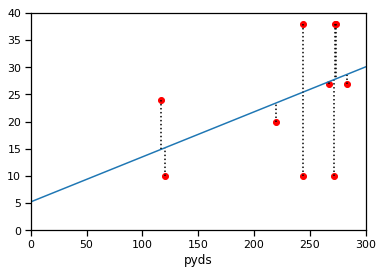

In [46]:
# defense in blue
ax = df.plot(x='pyds', y='score', style='ro', legend=False, xlim=(0,300), ylim=(0, 40))
ax.plot([0,300], [a0, a0+a1*300])
for xi, yi in zip(x1,y):
    ax.plot([xi]*2, [yi, a0+a1*xi], 'k:')

Optimization terminated successfully.
         Current function value: 1560.977153
         Iterations: 95
         Function evaluations: 177


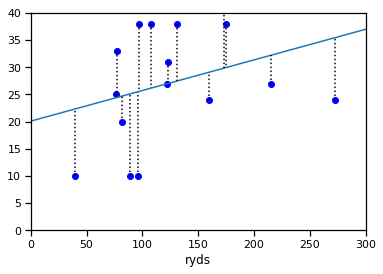

In [47]:
b0, b1 = fmin(sum_of_squares, [0,1], args=(x2,y))
b0, b1
ax = df.plot(x='ryds', y='score', style='bo', legend=False, xlim=(0,300), ylim=(0,40));
ax.plot([0,300], [b0, b0+b1*300])
for xi, yi in zip(x2,y):
    ax.plot([xi]*2, [yi, b0+b1*xi], 'k:') 

Optimization terminated successfully.
         Current function value: 1564.844587
         Iterations: 97
         Function evaluations: 181


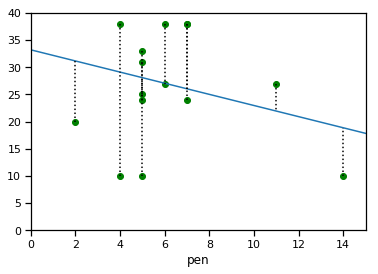

In [48]:
c0, c1 = fmin(sum_of_squares, [0,1], args=(x3,y))
c0, c1
ax = df.plot(x='pen', y='score', style='go', legend=False, xlim=(0,15), ylim=(0,40));
ax.plot([0,15], [c0, c0+c1*15])
for xi, yi in zip(x3,y):
    ax.plot([xi]*2, [yi, c0+c1*xi], 'k:')

Optimization terminated successfully.
         Current function value: 1601.396009
         Iterations: 92
         Function evaluations: 170


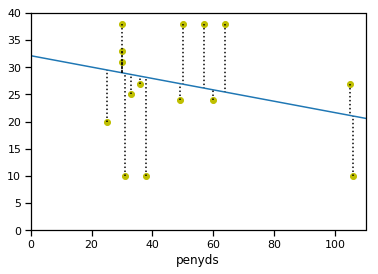

In [49]:
d0, d1 = fmin(sum_of_squares, [0,1], args=(x4,y))
d0, d1
ax = df.plot(x='penyds', y='score', style='yo', legend=False, xlim=(0,110), ylim=(0,40));
ax.plot([0,110], [d0, d0+d1*110])
for xi, yi in zip(x4,y):
    ax.plot([xi]*2, [yi, d0+d1*xi], 'k:')

Optimization terminated successfully.
         Current function value: 1665.189873
         Iterations: 83
         Function evaluations: 158


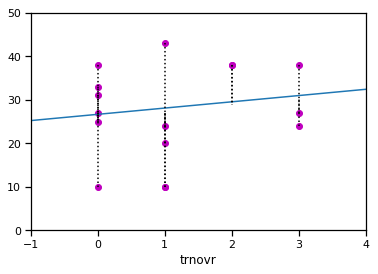

In [50]:
e0, e1 = fmin(sum_of_squares, [0,1], args=(x5,y))
e0, e1
ax = df.plot(x='trnovr', y='score', style='mo', legend=False, xlim=(-1,4), ylim=(0,50));
ax.plot([-1,4], [e0, e0+e1*4])
for xi, yi in zip(x5,y):
    ax.plot([xi]*2, [yi, e0+e1*xi], 'k:')

Optimization terminated successfully.
         Current function value: 926.222222
         Iterations: 92
         Function evaluations: 171


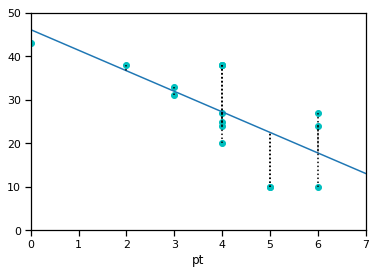

In [51]:
f0, f1 = fmin(sum_of_squares, [0,1], args=(x6,y))
f0, f1
ax = df.plot(x='pt', y='score', style='co', legend=False, xlim=(0,7), ylim=(0,50));
ax.plot([0,7], [f0, f0+f1*7])
for xi, yi in zip(x6,y):
    ax.plot([xi]*2, [yi, f0+f1*xi], 'k:')

Optimization terminated successfully.
         Current function value: 905.785036
         Iterations: 110
         Function evaluations: 204


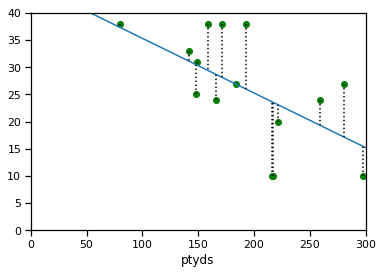

In [52]:
g0, g1 = fmin(sum_of_squares, [0,1], args=(x7,y))
g0, g1
ax = df.plot(x='ptyds', y='score', style='go', legend=False, xlim=(0,300), ylim=(0,40));
ax.plot([0,300], [g0, g0+g1*300])
for xi, yi in zip(x7,y):
    ax.plot([xi]*2, [yi, g0+g1*xi], 'k:')

Optimization terminated successfully.
         Current function value: 1410.796947
         Iterations: 88
         Function evaluations: 166


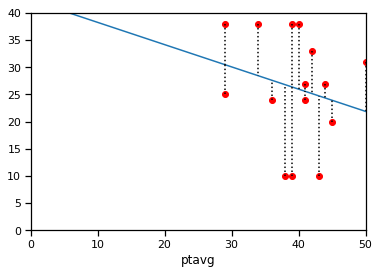

In [53]:
h0, h1 = fmin(sum_of_squares, [0,1], args=(x8,y))
h0, h1
ax = df.plot(x='ptavg', y='score', style='ro', legend=False, xlim=(0,50), ylim=(0,40));
ax.plot([0,50], [h0, h0+h1*50])
for xi, yi in zip(x8,y):
    ax.plot([xi]*2, [yi, h0+h1*xi], 'k:')

#### We assume that all factors have effects on scores, so we use those eight factors to model, but we find that it is not accurate.

In [54]:
from pymc3 import Normal, HalfCauchy, Deterministic, Model

with Model() as game_model:
    
    intercept = Normal('intercept', 0, sd=100)
    slope1 = Normal('slope1', 0, sd=100)
    slope2 = Normal('slope2', 0, sd=100)
    slope3 = Normal('slope3', 0, sd=100)
    slope4 = Normal('slope4', 0, sd=100)
    slope5 = Normal('slope5', 0, sd=100)
    slope6 = Normal('slope6', 0, sd=100)
    slope7 = Normal('slope7', 0, sd=100)
    slope8 = Normal('slope8', 0, sd=100)
    pyds = Deterministic('pyds', slope1)
    ryds = Deterministic('ryds', slope2)
    pen = Deterministic('pen', slope3)
    penyds = Deterministic('penyds', slope4)
    trnovr = Deterministic('trnovr', slope5)
    pt = Deterministic('pt', slope6)
    ptyds = Deterministic('ptyds', slope7)
    ptavg = Deterministic('ptavg', slope8)
    σ = HalfCauchy('σ', 1)

'pyds','ryds','pen','penyds','trnovr','pt','ptyds','ptavg',

But here we want to track `μ`, so we set it equal to **deterministic** variable mu_d. What's the shape of mu_d?

In [56]:
with game_model:
    
    μ = intercept + slope1*x1 + slope2*x2 + slope3*x3 + slope4*x4 + slope5*x5 + slope6*x6 + slope7*x7 + slope8*x8
    mu_d = Deterministic("mu_d",μ)
    score = Normal('score', mu=μ, sd=σ, observed=y)

All right! Now your regression model is fully specified and you are ready to track your posteriors.

You can now use the fitting method of your choice to estimate a posterior distribution. Let's use a **Markov chain Monte Carlo** algorithm, called **NUTS** (the No U-Turn Sampler).

In [57]:
from pymc3 import sample

with game_model:

    game_sample = sample(2000, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, slope8, slope7, slope6, slope5, slope4, slope3, slope2, slope1, intercept]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 10000/10000 [00:59<00:00, 167.32draws/s]
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
There were 65 divergences after tuning. Increase `target_accept` or reparameterize.
There were 105 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


Ok.. to be expected.. pymc3 tells us the results are not very good..

Let's plot posteriors anyway:

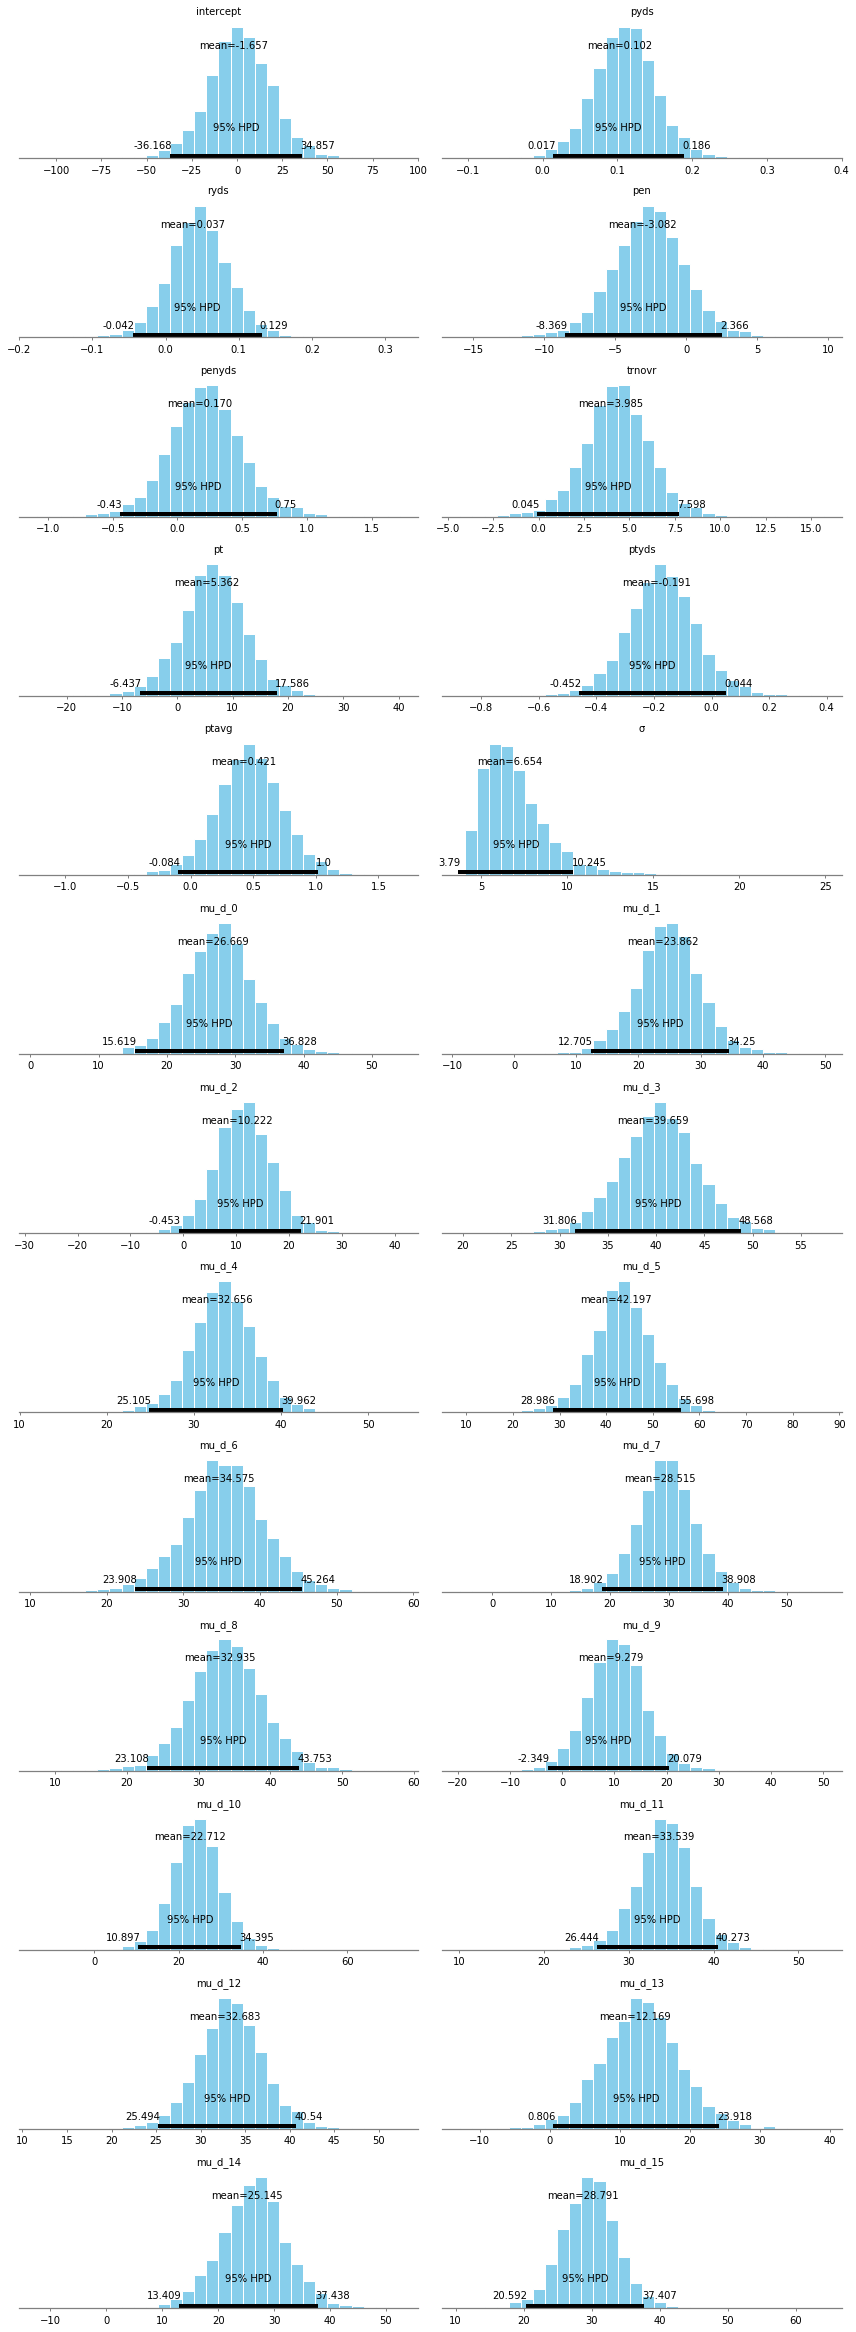

In [20]:
from pymc3 import plot_posterior

plot_posterior(game_sample[500:], varnames=['intercept', 'pyds','ryds','pen','penyds','trnovr','pt','ptyds','ptavg', 'σ', 'mu_d']);

#### So we improve the model, choose two factors pt and ptyds which fit in linear regression.

In [58]:
with Model() as better_model:
    
    intercept = Normal('intercept', 0, sd=100)
    slope1 = Normal('slope1', 0, sd=100)
    slope2 = Normal('slope2', 0, sd=100)
    pt = Deterministic('pt', slope1)
    ptyds = Deterministic('ptyds', slope2)
    σ = HalfCauchy('σ', 1)

In [59]:
with better_model:
    
    μ = intercept + slope1*x6 + slope2*x7
    mu_d = Deterministic("mu_d",μ)
    score = Normal('score', mu=μ, sd=σ, observed=y)

#### The result doesn't show that "The number of effective samples is smaller than 10% for some parameters." So using these two factors to model get better results than other factors. 

In [61]:
from pymc3 import sample

with better_model:
    better_sample = sample(2000, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, slope2, slope1, intercept]
Sampling 4 chains: 100%|█████████████████████████████████████████████████████| 10000/10000 [00:23<00:00, 426.16draws/s]
The acceptance probability does not match the target. It is 0.9062799216570868, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


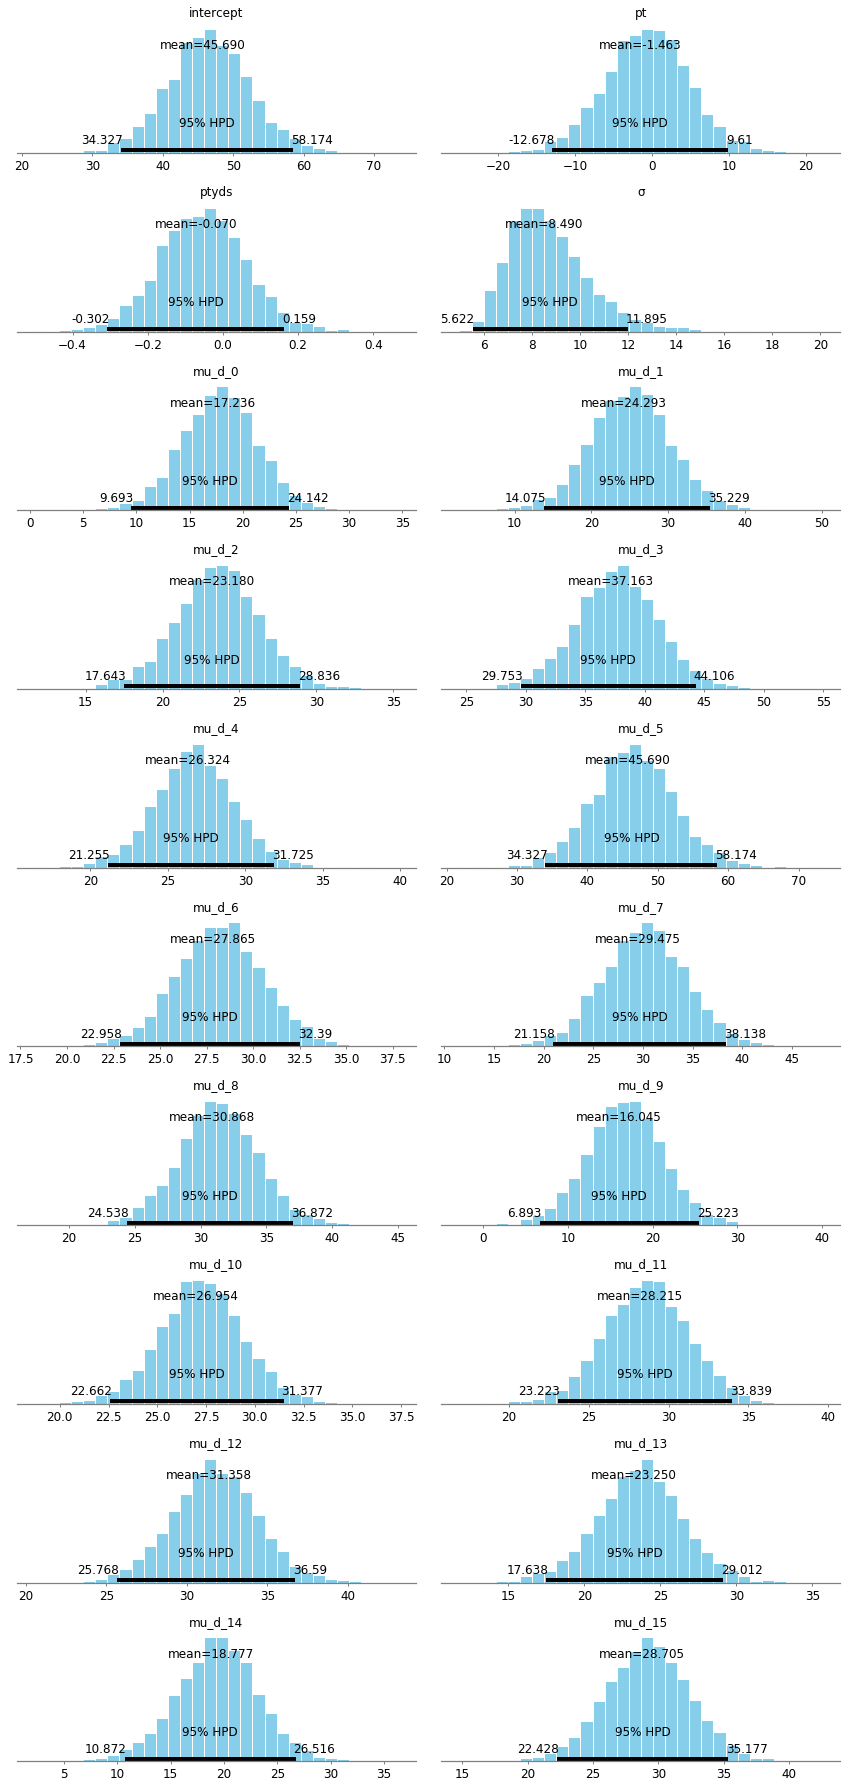

In [62]:
from pymc3 import plot_posterior

plot_posterior(better_sample[500:], varnames=['intercept','pt','ptyds', 'σ', 'mu_d']);

We have 10 `mu_d`s above, one per game.

# Checking model fit

One intuitive way of evaluating model fit is to compare model predictions with the observations used to fit the model. In other words, the fitted model can be used to **simulate
data**, and the distribution of the simulated data should resemble the distribution of the actual data.

Sampling from the **posterior predictive distribution** is straighforward in PyMC3. The `sample_ppc` function draws posterior predictive checks from all of the data likelihoods. 

In [63]:
from pymc3 import sample_ppc

with better_model:
    
    game_ppc = sample_ppc(better_sample, 1000)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1868.50it/s]


This yields 1000 simulated games corresponding to each of the ten data points in our observation vector.

In [64]:
game_ppc['score'].shape

(1000, 16)

We can then compare these simulated data to the data we used to fit the model. 

The model should prove that ***it*** could have been used to generate the game data that we observed.

We plot 10 histograms `hist`, one for each of the 1,000 simulations per game. Since each simulation yields different points per game, it makes sense that all these simulations put together yeild a histogram. We know see if the mean points per game for all 1,000 simulations matches the real score of each game, represented by a red line. 

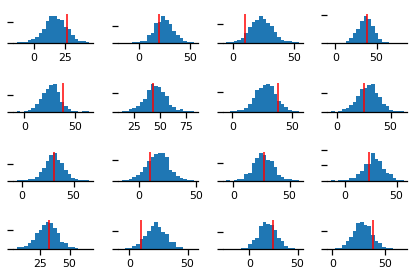

In [65]:
fig, axes = plt.subplots(4, 4)
axes_flat = axes.flatten()

for ax, real_data, sim_data in zip(axes_flat[:], y, game_ppc['score'].T):
    ax.hist(sim_data, bins=20)
    ax.vlines(real_data, *ax.get_ylim(), colors='red')
    ax.set_yticklabels([])
    sns.despine(left=True)

#axes_flat[-1].axis('off')
plt.tight_layout()

Ok, that looks pretty good.

Let's explore:

In [66]:
game_ppc['score'][0]


array([ 8.42122904, 14.87147397, 31.24833912, 40.05655265, 31.98314965,
       49.83328645, 37.88658961, 19.10074704, 20.51764157, 12.75721142,
        7.43952409, 53.30081866, 39.73040926, 36.95250201, 16.66562157,
       22.59625107])

In [67]:
len(game_sample['σ'])

8000

8000 points because 4 chains of 2000 points each. If you only have 2 processors on your laptop, you should have half that many points.

The [highest posterior density interval](highest posterior density interval) (HDI) is the shortest interval on a posterior density for some given confidence level. HDI has the nice property that any point **within** the interval has a higher density than any other point outside. Thus, the HPD interval is **the** collection of most likely values of a parameter.

What is the interval for the likely values for the RBIs?

In [68]:
import pymc3 as pm
pm.stats.hpd(better_sample['pt'])

array([-13.18471889,   9.72681168])

In [70]:
pm.stats.hpd(better_sample['ptyds'])

array([-0.31558157,  0.16004191])

Quantiles are sets of values of a variate that divide a frequency distribution into equal groups, each containing the same fraction of the total population. The Median for example separates the two halves of a group. So batters below the median RBI *suck*, and those above it are *ok* :-)

In [71]:
pm.stats.quantiles(better_sample['pt'])

{2.5: -13.156483499122858,
 25: -5.162510145179865,
 50: -1.4739417832438975,
 75: 2.2258403251783783,
 97.5: 9.78546573240783}

Likewise with the pitchers. These with an ERA less than -8 (-8? How did we get to negative numbers? That's my bad - bad model).

In [72]:
pm.stats.quantiles(better_sample['ptyds'])

{2.5: -0.3019395660892276,
 25: -0.14509923111893394,
 50: -0.06821644608102717,
 75: 0.0079342187396477,
 97.5: 0.17576375802585395}

Now let's collect our simulated latent parameters from the simulation, and build our theoretical model (which was verified to be "ok") with these parameters. The parameters now drive the score, which is what we want.

Since the score is a normal distribution, we enter its mean and its standard deviation as modelled:

In [76]:
#'pyds','ryds','pen','penyds','trnovr','pt','ptyds','ptavg',
pts = better_sample['pt']
ptydss = better_sample['ptyds']
intercepts = better_sample['intercept']
sig = better_sample['σ']
# assuming x = z = 1
score_samples = Normal.dist(intercepts + pts + ptydss, sig).random()

In [77]:
len(score_samples)

8000

The mean of the RBIs for the simulation is:

In [78]:
pts.mean()

-1.5114734622265193

The mean probability that the team that played the 10 observed games actually wins is above 75%. Pretty good!

In [79]:
(score_samples > 20).mean()

0.983875

#### So we can Observe that the less the pt and pytds, the greater the score, so we multiply 0.8. However, mean is negative, it multiply 0.8 will get the more convergent result. Actually, the result is not necessarily getting smaller.

In [83]:
z_score = 1 - 0.2
higher_pts = pts * z_score
higher_pts.mean()

-1.2091787697812155

Let's evaluate the new scores based on our model:

In [84]:
new_score_samples = Normal.dist(intercepts + pts + higher_pts, sig).random()

And what's the probability of winning *now*?

In [85]:
(new_score_samples > 20).mean()

0.9535

In [86]:
x_score = 1 - 0.2
higher_ptyds = ptydss * x_score
higher_ptyds.mean()

-0.05459535012079094

Let's evaluate the new scores based on our model:

In [87]:
new2_score_samples = Normal.dist(intercepts + higher_ptyds + ptydss, sig).random()

And what's the probability of winning *now*?

In [88]:
(new2_score_samples > 20).mean()

0.990875

Lower, right? Because the pitchers are *worse*.

<img src="ipynb.images/goofs.png" width=200>

And this is how you'd leverage `pandas` to tabulate the **last 10** estimates of the simulation (where you've theoretically converged to the correct values, assuming you converged, which in the case of modeling point data with a Normal distribution instead of a Poisson distribution is *doubtful*):

In [89]:
d = {'pts': pts[7990:],'ptyds': ptydss[7990:],'score':score_samples[7990:]}
pd.DataFrame(d)

,pts,ptyds,score
0,0.937857,-0.093256,27.247563
1,3.474268,-0.144447,47.234914
2,8.800564,-0.258178,49.885234
3,9.880911,-0.271673,49.145846
4,-10.199467,0.076588,38.303196
5,-12.339027,0.132934,30.623064
6,-9.717726,0.107277,39.042002
7,-10.231994,0.089147,25.616457
8,-16.466672,0.200682,29.609417
9,-14.662041,0.204161,31.813353
